In [1]:
import os

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from config import Metrics, Config

PALETTE = sns.color_palette("viridis", 5)
DPI=600

In [2]:
CONFIG_PATH = os.getenv("CONFIG_PATH", "./config.json")

if os.path.exists(CONFIG_PATH):
    config = Config.from_json(CONFIG_PATH)
else:
    config = Config()
    config.store_as_json(CONFIG_PATH)

In [3]:
curr_checkpoint = config.get_curr_checkpoint()
num_batches_per_checkpoint = config.batches_per_checkpoint

/home/dallin/miniconda3/envs/deep_learning/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/dallin/miniconda3/envs/deep_learning/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


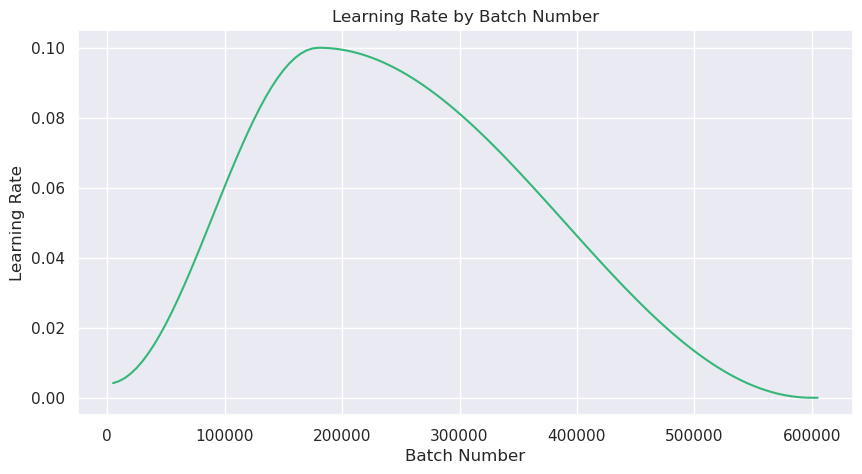

In [4]:
# Create a plot of the learning rate by batch number
learning_rates = curr_checkpoint.metrics.learning_rate
batch_num_by_checkpoint = [num_batches_per_checkpoint * i for i in range(1, len(learning_rates) + 1)]
plot_name = "learning_rate_by_batch_number.jpg"

sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(10, 5))

sns.lineplot(x=batch_num_by_checkpoint, y=learning_rates, ax=ax, color=PALETTE[3])
ax.set_title("Learning Rate by Batch Number")
ax.set_xlabel("Batch Number")
ax.set_ylabel("Learning Rate")


plt.savefig(os.path.join(config.checkpoint_path, plot_name), dpi=DPI)




/tmp/ipykernel_55431/4117896418.py:21: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.lineplot(x="Batch Number", y="Loss", hue="Type", data=mse_loss_df, ax=ax, palette=PALETTE)
/home/dallin/miniconda3/envs/deep_learning/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/dallin/miniconda3/envs/deep_learning/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


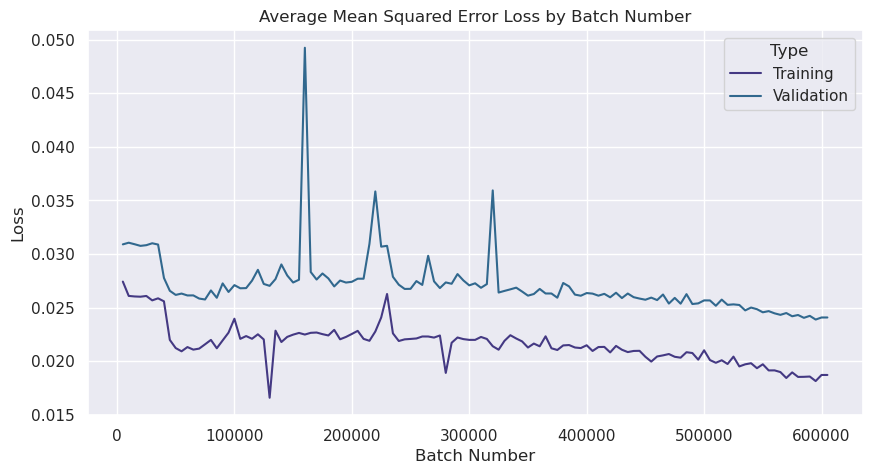

In [5]:
# Create plot of MSE loss over time
train_losses = curr_checkpoint.metrics.training_loss
val_losses = curr_checkpoint.metrics.validation_loss

mse_loss_data = {"Batch Number": [], "Loss": [], "Type": []}
for batch_num, train_loss, val_loss in zip(batch_num_by_checkpoint, train_losses, val_losses):
    mse_loss_data["Batch Number"].append(batch_num)
    mse_loss_data["Loss"].append(train_loss)
    mse_loss_data["Type"].append("Training")

    mse_loss_data["Batch Number"].append(batch_num)
    mse_loss_data["Loss"].append(val_loss)
    mse_loss_data["Type"].append("Validation")
mse_loss_df = pd.DataFrame(mse_loss_data)

plot_name = "mse_loss_by_batch_number.jpg"

sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(10, 5))

sns.lineplot(x="Batch Number", y="Loss", hue="Type", data=mse_loss_df, ax=ax, palette=PALETTE)
ax.set_title("Average Mean Squared Error Loss by Batch Number")
ax.set_xlabel("Batch Number")
ax.set_ylabel("Loss")


plt.savefig(os.path.join(config.checkpoint_path, plot_name), dpi=DPI)



/home/dallin/miniconda3/envs/deep_learning/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/dallin/miniconda3/envs/deep_learning/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


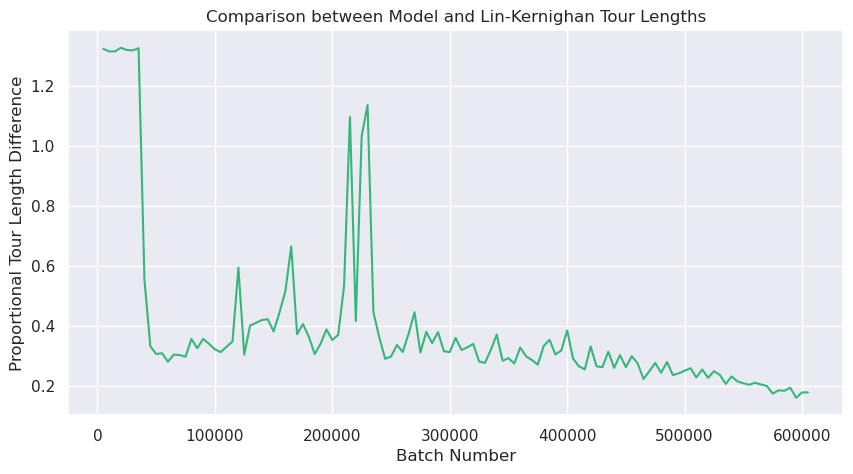

In [6]:
# Create a plot of the path construction metrics
path_construction_metrics = curr_checkpoint.metrics.path_construction_metrics
plot_name = "path_metric_by_batch_number.jpg"

sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(10, 5))

sns.lineplot(x=batch_num_by_checkpoint, y=path_construction_metrics, ax=ax, color=PALETTE[3])
ax.set_title("Comparison between Model and Lin-Kernighan Tour Lengths")
ax.set_xlabel("Batch Number")
ax.set_ylabel("Proportional Tour Length Difference")


plt.savefig(os.path.join(config.checkpoint_path, plot_name), dpi=DPI)




/home/dallin/miniconda3/envs/deep_learning/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/dallin/miniconda3/envs/deep_learning/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


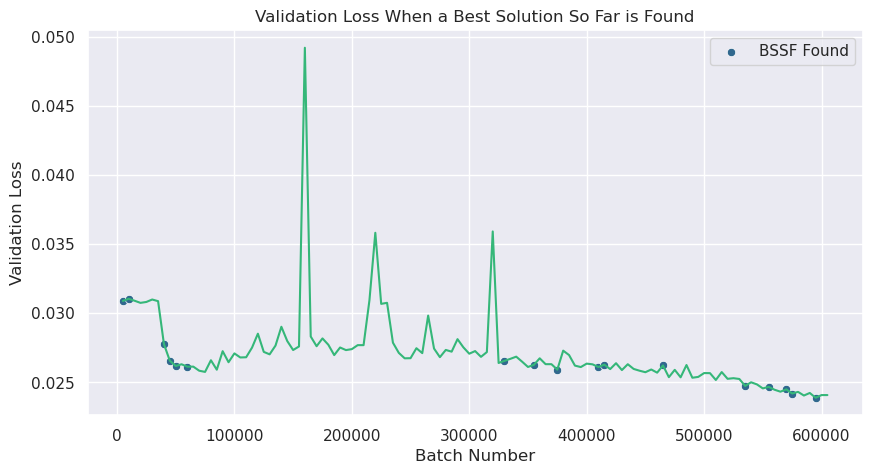

In [7]:
# Create a plot showing the validation loss and indicating when a bssf was found
validation_losses = curr_checkpoint.metrics.validation_loss

curr_bssf = None
bssf_points = []
for batch_num, path_metric, validation_loss in zip(batch_num_by_checkpoint, path_construction_metrics, validation_losses):
    if curr_bssf is None:
        curr_bssf = path_metric
        bssf_points.append((batch_num, validation_loss))
    elif path_metric < curr_bssf:
        curr_bssf = path_metric
        bssf_points.append((batch_num, validation_loss))


plot_name = "validation_loss_with_bssf_points.jpg"

sns.set_theme(style="darkgrid")

fig, ax = plt.subplots(figsize=(10, 5))


sns.lineplot(x=batch_num_by_checkpoint, y=validation_losses, ax=ax, color=PALETTE[3])
sns.scatterplot(x=[point[0] for point in bssf_points], y=[point[1] for point in bssf_points], ax=ax, color=PALETTE[1], label="BSSF Found")
ax.set_title("Validation Loss When a Best Solution So Far is Found")
ax.set_xlabel("Batch Number")
ax.set_ylabel("Validation Loss")
plt.legend()

plt.savefig(os.path.join(config.checkpoint_path, plot_name), dpi=DPI)


In [9]:
# Load calculation time data
from dataclasses import dataclass
from typing import Optional
import json
from multiprocessing import Pool, cpu_count

from tqdm.notebook import tqdm

from tsp_tinker_utils import TSPPackage, TSPAlgorithm, get_tsp_problem_folders

@dataclass
class ProblemMetrics:
    prob_size: int
    lin_ker_calc_time: float
    naive_calc_time: float
    naive_path_metric: float

def extract_and_calc_metrics(problem_file_path: os.PathLike) -> Optional[ProblemMetrics]:
    with open(problem_file_path, "r") as file:
        json_data = json.load(file)

    tsp_package = TSPPackage.from_json(json_data)
    lin_solution = None
    naive_solution = None
    for solution in tsp_package.solutions:
        if solution.algorithm_name == TSPAlgorithm.LIN_KERNIGHAN:
            lin_solution = solution
        elif solution.algorithm_name == TSPAlgorithm.NAIVE_HEURISTIC:
            naive_solution = solution

    if lin_solution is None or naive_solution is None:
        return None
    
    naive_path_metric = (naive_solution.tot_cost - lin_solution.tot_cost ) / lin_solution.tot_cost

    return ProblemMetrics(tsp_package.problem.num_cities, lin_solution.calculation_time, naive_solution.calculation_time, naive_path_metric)


possible_folders = get_tsp_problem_folders(config.data_path)
problem_file_paths = []
for _, problem_size, folder_path in possible_folders:
    # Add all files in the folder to the list of files to load
    for file in os.listdir(folder_path):
        if file.endswith(".json"):
            problem_file_paths.append(os.path.join(folder_path, file))

naive_path_metrics = []
calc_times_divided_dict = {"Type": [], "Problem Size": [], "Calculation Time": []}

with Pool(processes=cpu_count() - 1) as worker_pool:
    with tqdm(
        total=len(problem_file_paths), desc="Loading metrics from disk..."
    ) as p_bar:
        for data in worker_pool.imap_unordered(
            extract_and_calc_metrics,
            problem_file_paths,
            chunksize=10,
        ):
            p_bar.update(1)
            if data is None:
                continue

            naive_path_metrics.append(data.naive_path_metric)
            calc_times_divided_dict["Type"].append("Lin-Kernighan")
            calc_times_divided_dict["Problem Size"].append(data.prob_size)
            calc_times_divided_dict["Calculation Time"].append(data.lin_ker_calc_time)

            calc_times_divided_dict["Type"].append("Naive Heuristic")
            calc_times_divided_dict["Problem Size"].append(data.prob_size)
            calc_times_divided_dict["Calculation Time"].append(data.naive_calc_time)

assert len(naive_path_metrics) != 0

# Load calculation time for the model
with open(os.path.join(config.bssf_path, "construction_time.json"), "r") as f:
    model_calc_times = json.load(f)

for prob_size, calc_times in model_calc_times.items():
    for calc_time in calc_times:
        calc_times_divided_dict["Type"].append("Convolutional Salesman")
        calc_times_divided_dict["Problem Size"].append(int(prob_size))
        calc_times_divided_dict["Calculation Time"].append(calc_time)

with open(os.path.join(config.bssf_path, "final_stats.json"), "r") as f:
    final_stats = json.load(f)

for prob_size, calc_times in final_stats["construction_time_by_size"].items():
    for calc_time in calc_times:
        calc_times_divided_dict["Type"].append("Convolutional Salesman")
        calc_times_divided_dict["Problem Size"].append(int(prob_size))
        calc_times_divided_dict["Calculation Time"].append(calc_time)

calc_times_df = pd.DataFrame(calc_times_divided_dict)

validation_mse = final_stats["validation_mse"]
test_mse = final_stats["test_mse"]
validation_path_metric = final_stats["validation_path_metric"]
test_path_metric = final_stats["test_path_metric"]
naive_path_metric = sum(naive_path_metrics) / len(naive_path_metrics)

Loading metrics from disk...:   0%|          | 0/255000 [00:00<?, ?it/s]

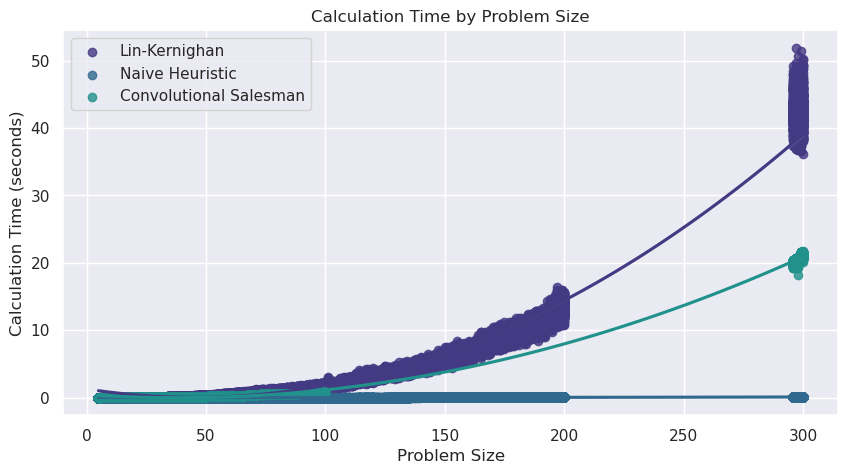

In [18]:
# Create a regression for each algorithm calc time

plot_name = "calc_time_by_problem_size.jpg"

sns.set_theme(style="darkgrid")

fig, ax = plt.subplots(figsize=(10, 5))
possible_types = calc_times_df["Type"].unique()
for i, type_name in enumerate(possible_types):
    sns.regplot(x="Problem Size", y="Calculation Time", data=calc_times_df[calc_times_df["Type"] == type_name], ax=ax, order=2, label=type_name, color=PALETTE[i])
# sns.regplot(x="Problem Size", y="Calculation Time", data=calc_times_df, hue="Type", ax=ax, order=2, palette=PALETTE)
ax.set_title("Calculation Time by Problem Size")
ax.set_xlabel("Problem Size")
ax.set_ylabel("Calculation Time (seconds)")
ax.legend()

plt.savefig(os.path.join(config.checkpoint_path, plot_name), dpi=DPI)

/home/dallin/miniconda3/envs/deep_learning/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


Text(0, 0.5, 'Proportional Tour Length Difference')

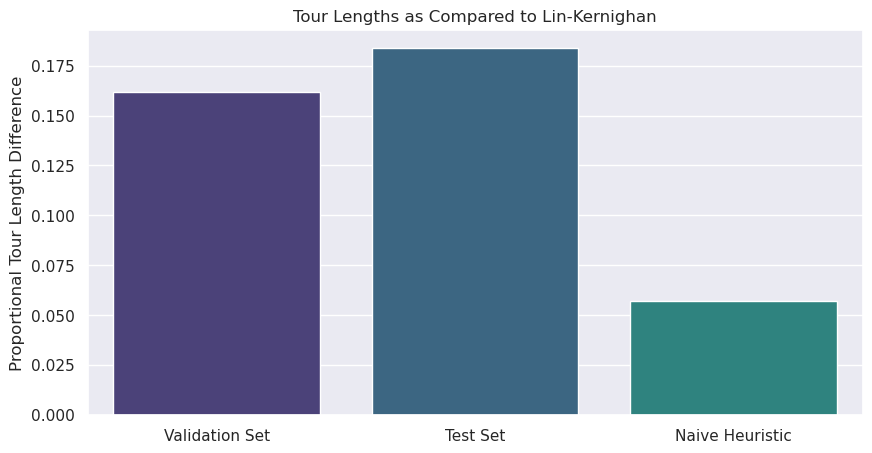

In [15]:
# Create a bar plot to display the path construction metrics
plot_name = "path_metric_comparison.jpg"

sns.set_theme(style="darkgrid")

fig, ax = plt.subplots(figsize=(10, 5))

sns.barplot(x=["Validation Set", "Test Set", "Naive Heuristic"], y=[validation_path_metric, test_path_metric, naive_path_metric], palette=PALETTE)
ax.set_title("Tour Lengths as Compared to Lin-Kernighan")
ax.set_ylabel("Proportional Tour Length Difference")
